In [1]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)


In [3]:
x,y = mnist.data, mnist.target

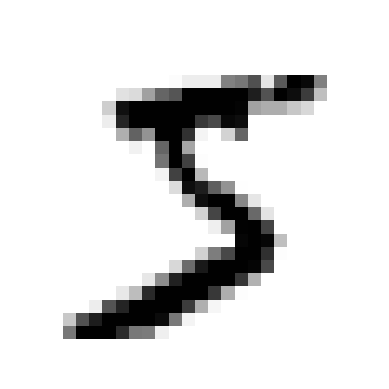

In [4]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis(False)

some_digit = x[0]
plot_digit(some_digit)
plt.show()

In [5]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

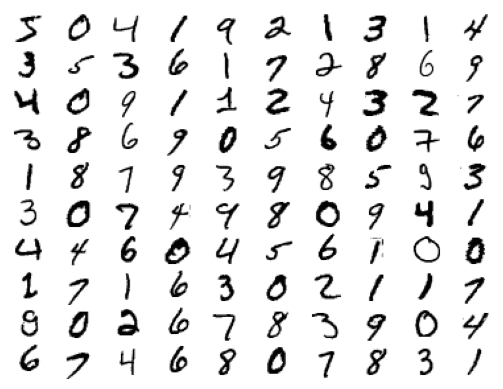

In [6]:

for idx, data in enumerate(x[:100]):
    plt.subplot(10,10,idx+1)
    plot_digit(data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [7]:
for i in range(0,100):
    if(i%10 == 0 and i!=0 ): 
        print("")
    print(y[i], end=" ")


5 0 4 1 9 2 1 3 1 4 
3 5 3 6 1 7 2 8 6 9 
4 0 9 1 1 2 4 3 2 7 
3 8 6 9 0 5 6 0 7 6 
1 8 7 9 3 9 8 5 9 3 
3 0 7 4 9 8 0 9 4 1 
4 4 6 0 4 5 6 1 0 0 
1 7 1 6 3 0 2 1 1 7 
9 0 2 6 7 8 3 9 0 4 
6 7 4 6 8 0 7 8 3 1 

In [8]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([x[11]])

array([ True])

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_train, y_train_5, cv=5, scoring="accuracy")


array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [12]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)

DummyClassifier()

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [14]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [15]:
from sklearn.metrics import precision_score, recall_score

print("Precision: " , precision_score(y_train_5, y_train_pred))

print("Recall: " , recall_score(y_train_5, y_train_pred))

Precision:  0.8370879772350012
Recall:  0.6511713705958311


In [16]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [17]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,method="decision_function")

In [18]:
print(y_scores)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


In [19]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [20]:
threshold = 0

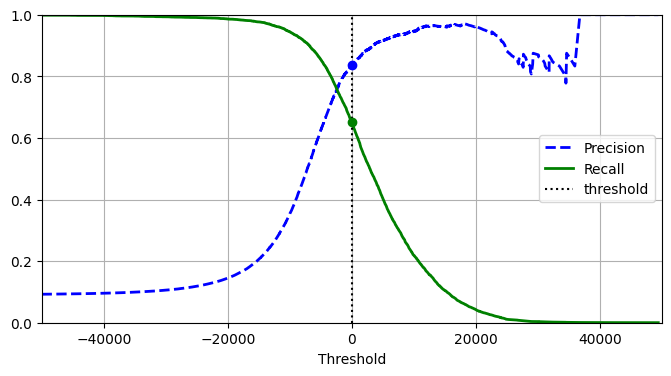

In [21]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.savefig("Prec Recall and Tresshold")

plt.show()

In [22]:
idx_for_90_precision = (precisions >= 0.90).argmax()
print(idx_for_90_precision)
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

57109


3370.0194991439557

In [23]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)

svm_clf.fit(x_train[:2000], y_train[:2000])

SVC(random_state=42)

In [24]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [25]:
svm_clf.predict([x[4]])



array(['9'], dtype=object)

In [26]:
some_digit_score = svm_clf.decision_function([x[1]])

some_digit_score.round(2)

array([[ 9.31, -0.29,  6.14,  7.21,  0.71,  8.28,  3.8 ,  1.77,  2.77,
         5.11]])

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

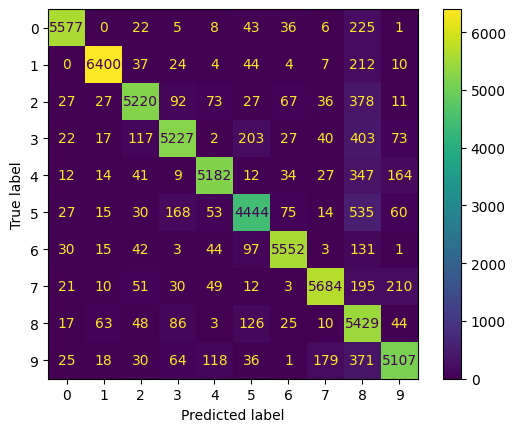

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled,y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

plt.show()


In [31]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

In [32]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [33]:
knn_clf.predict([some_digit])

array([[False,  True]])